In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Using data file: ../output/3D/results/Si_3D_DEG3_NP16_NA24MESHcuboid_2x2x2.txt
(10000, 7)


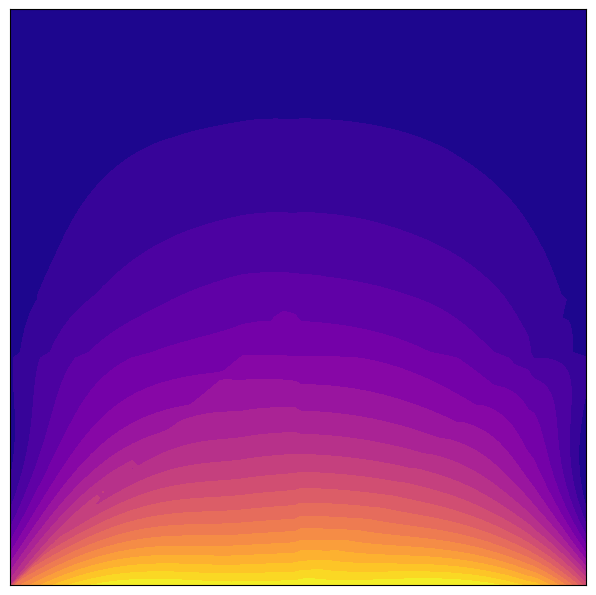

In [5]:
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)
plt.gca().set_aspect('equal')

model = "Si_3D_DEG3_NP16_NA24MESHcuboid_2x2x2"

filename = "../output/3D/results/" + model + ".txt"
print(f"Using data file: {filename}")
data = np.loadtxt(filename, skiprows = 1)
print (data.shape)
X = data[:,0]
Y = data[:,1]
Z = data[:,2]
T = data[:,3]

Nx = 100
Ny = 100

Xgrid = np.zeros((Ny,Nx))
Ygrid = np.zeros((Ny,Nx))
Tgrid = np.zeros((Ny,Nx))

for j in range(0,Ny):
	for i in range (0,Nx):
		Xgrid[j,i] = X[i+j*Nx]
		Ygrid[j,i] = Y[i+j*Nx]
		Tgrid[j,i] = T[i+j*Nx]

c = plt.contourf(Xgrid, Ygrid, Tgrid, np.linspace(T.min(), T.max(), 21), cmap='plasma')

plt.axis([0, 1.0e-6, 0, 1.0e-6])
ax.tick_params(axis='both',labelsize=24)
ax.set_xticks([])
ax.set_yticks([])


plt.tight_layout()
plt.subplots_adjust(left=0.01, right=0.98, top=0.98, bottom=0.02,wspace=0.28)
plt.savefig("3D/results/" + model + ".png")
plt.show()

Using data file: ../output/3D/results/D4_NP16NA24_NonGraySMRT_L1e-6_1Dslice.txt
(100, 7)
Using data file: ../output/3D/results/D4_NP16NA24_NonGraySMRT_L1e-7_1Dslice.txt
(100, 7)


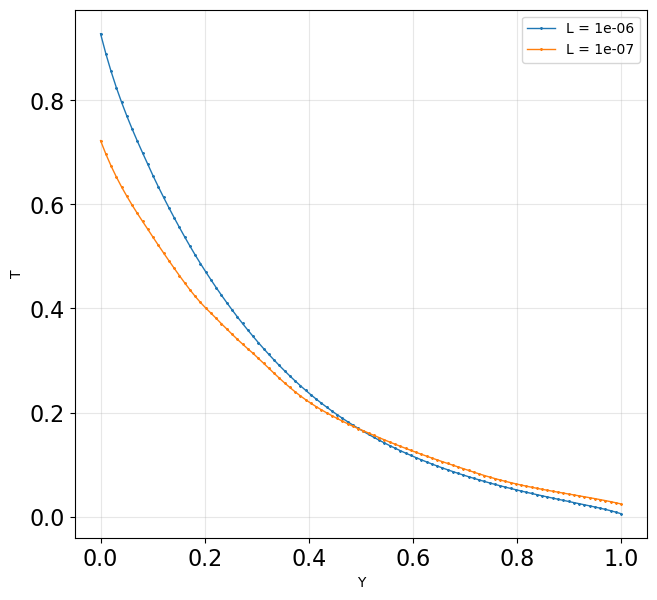

In [4]:
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
plt.gca().set_aspect('equal')

model = ["D4_NP16NA24_NonGraySMRT_L1e-6_1Dslice", "D4_NP16NA24_NonGraySMRT_L1e-7_1Dslice"]
L = [1.0e-6, 1.0e-7]

for i in range(len(model)):
    filename = "../output/3D/results/" + model[i] + ".txt"
    print(f"Using data file: {filename}")
    data = np.loadtxt(filename, skiprows = 1)
    print (data.shape)
    X = data[:,0]
    Y = data[:,1] / L[i]
    Z = data[:,2]
    T = data[:,3] + 0.5
    ax.plot(Y, T, '*-', markersize=1.5, linewidth=1, label=f'L = {L[i]}')


ax.legend()

ax.set_xlabel('Y')
ax.set_ylabel('T')
ax.tick_params(axis='both', labelsize=16)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.1,wspace=0.28)
plt.savefig("3D/results/T_1DSlice.png")
plt.show()